In [34]:

import pandas as pd 
import tweepy
import json 
import matplotlib.pyplot as plt
import requests
import numpy as np
from datetime import datetime
from matplotlib.font_manager import FontProperties
from config3_read import consumer_key, consumer_secret, access_token, access_token_secret 


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [35]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [36]:
news_outlets = ['nytimes', 'CNN', 'BBC','CBS', 'fox' ]
tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_outlets :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []

public_tweets = api.user_timeline(target_outlet, count=tweet_count)
i = 0
for tweet in public_tweets:
        #print(tweet)
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"]
        #Sentiment Analysis
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i+1               
 

In [38]:
#dataframe for the output
data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
news_sentiment_analysis = news_sentiment_analysis.append(data)  

news_sentiment_analysis.set_index('news_media', 'create_date')
news_sentiment_analysis.to_csv("./news_media_analysis500.csv")

In [39]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
print(tweets_ago.values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  4

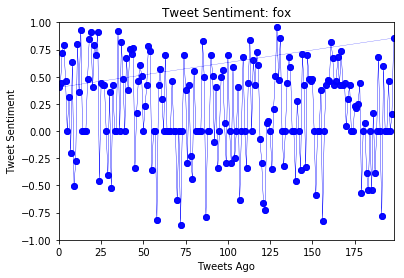

In [40]:
# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'fox')
plt.show()

In [45]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
print(tweets_ago.values)

[]


In [44]:
# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'fox')
plt.show()

ValueError: Axis limits cannot be NaN or Inf